In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
dataframe = pd.read_csv('testset.csv')

In [4]:
dataframe.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


#### Q.1 Clean the data. Detect and remove outliers.

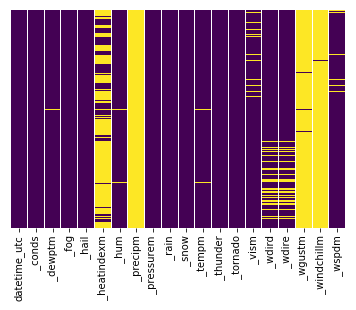

In [5]:
sns.heatmap(dataframe.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
dataframe.drop([' _heatindexm', ' _precipm', ' _wgustm', ' _windchillm',' _wdird', ' _wdire' ], axis=1, inplace=True)

In [7]:
dataframe.head(3)

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,7.4
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,NaN


In [8]:
dataframe['datetime_utc'] = pd.to_datetime(dataframe['datetime_utc'])

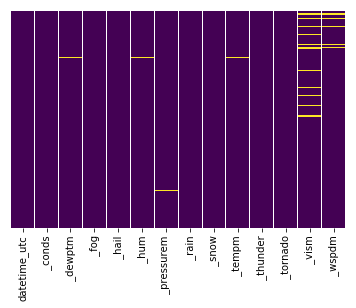

In [9]:
sns.heatmap(dataframe.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
dataframe.columns = dataframe.columns.str.strip(' _') # to remove blank spaces right and left

In [11]:
dataframe.isnull().sum()

datetime_utc       0
conds             72
dewptm           621
fog                0
hail               0
hum              757
pressurem        232
rain               0
snow               0
tempm            673
thunder            0
tornado            0
vism            4428
wspdm           2358
dtype: int64

In [12]:
dataframe["dewptm"].fillna(dataframe["dewptm"].mean(),inplace=True)
dataframe["hum"].fillna(dataframe["hum"].mean(),inplace=True)
dataframe["pressurem"].fillna(dataframe["pressurem"].mean(),inplace=True)
dataframe["tempm"].fillna(dataframe["tempm"].mean(),inplace=True)
dataframe["vism"].fillna(dataframe["vism"].mean(),inplace=True)
dataframe["wspdm"].fillna(dataframe["wspdm"].mean(),inplace=True)

In [13]:
dataframe.isnull().sum()

datetime_utc     0
conds           72
dewptm           0
fog              0
hail             0
hum              0
pressurem        0
rain             0
snow             0
tempm            0
thunder          0
tornado          0
vism             0
wspdm            0
dtype: int64

In [15]:
# dropping rows with na value
dataframe.dropna(inplace=True)

In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100918 entries, 0 to 100989
Data columns (total 14 columns):
datetime_utc    100918 non-null datetime64[ns]
conds           100918 non-null object
dewptm          100918 non-null float64
fog             100918 non-null int64
hail            100918 non-null int64
hum             100918 non-null float64
pressurem       100918 non-null float64
rain            100918 non-null int64
snow            100918 non-null int64
tempm           100918 non-null float64
thunder         100918 non-null int64
tornado         100918 non-null int64
vism            100918 non-null float64
wspdm           100918 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(6), object(1)
memory usage: 11.5+ MB


In [17]:
dataframe.set_index('datetime_utc',inplace=True)

In [18]:
dataframe.head(3)

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wspdm
datetime_utc,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.000000,7.400000
1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,2.402774,7.678463
1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,2.402774,7.678463


In [19]:
dataframe.columns

Index(['conds', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wspdm'],
      dtype='object')

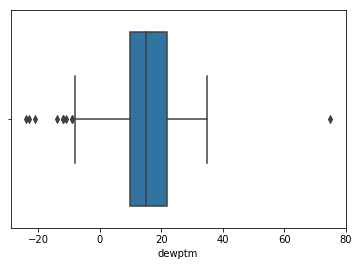

In [22]:
#way to check outliers in every column.
sns.boxplot(x='dewptm', data=dataframe)

#### The dots are the outliers in the above graph

In [23]:
#_conds has no float or int values, no outliers can be calculated
df_columns = ['dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wspdm']

In [24]:
#removing outliers
for x in df_columns:
    dataframe[x] = dataframe[x][dataframe[x].between(dataframe[x].quantile(.025),dataframe[x].quantile(.975))]

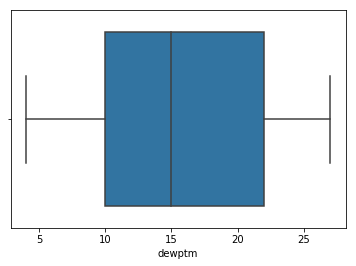

In [25]:
# check if outliers exist
sns.boxplot(x='dewptm', data=dataframe)

In [26]:
import datetime

In [27]:
dataframe['date']= dataframe.index.date

In [28]:
type(dataframe['date'][0])

datetime.date

In [29]:
dataframe.head()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wspdm,date
datetime_utc,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0.0,27.0,1010.0,0,0.0,30.0,0.0,0.0,5.000000,7.400000,1996-11-01
1996-11-01 12:00:00,Smoke,10.0,0,0.0,32.0,NaN,0,0.0,28.0,0.0,0.0,2.402774,7.678463,1996-11-01
1996-11-01 13:00:00,Smoke,11.0,0,0.0,44.0,NaN,0,0.0,24.0,0.0,0.0,2.402774,7.678463,1996-11-01
1996-11-01 14:00:00,Smoke,10.0,0,0.0,41.0,1010.0,0,0.0,24.0,0.0,0.0,2.000000,7.678463,1996-11-01
1996-11-01 16:00:00,Smoke,11.0,0,0.0,47.0,1011.0,0,0.0,23.0,0.0,0.0,1.200000,0.000000,1996-11-01


In [30]:
dataframe['month'] = dataframe['date'].apply(lambda x: x.month)
dataframe['year'] = dataframe['date'].apply(lambda x: x.year)

In [31]:
dataframe.head(3)

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wspdm,date,month,year
datetime_utc,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0.0,27.0,1010.0,0,0.0,30.0,0.0,0.0,5.000000,7.400000,1996-11-01,11,1996
1996-11-01 12:00:00,Smoke,10.0,0,0.0,32.0,NaN,0,0.0,28.0,0.0,0.0,2.402774,7.678463,1996-11-01,11,1996
1996-11-01 13:00:00,Smoke,11.0,0,0.0,44.0,NaN,0,0.0,24.0,0.0,0.0,2.402774,7.678463,1996-11-01,11,1996


In [32]:
dataframe.isna().sum()

conds           0
dewptm       3670
fog             0
hail           13
hum          2432
pressurem    4270
rain            0
snow            1
tempm        4285
thunder       952
tornado         2
vism         3608
wspdm        2135
date            0
month           0
year            0
dtype: int64

In [37]:
for i in df_columns:
    dataframe[i].fillna(dataframe[i].mean(), inplace=True)

In [38]:
dataframe.isna().sum()

conds        0
dewptm       0
fog          0
hail         0
hum          0
pressurem    0
rain         0
snow         0
tempm        0
thunder      0
tornado      0
vism         0
wspdm        0
date         0
month        0
year         0
dtype: int64

#### Q.2 Make a plot of different numeric features like rain, snow, dewptm, etc. over the duration of a month or year or day. Check out this example: https://imgur.com/8cWLxiw
#### In each subplot, 
#### y-axis: any numeric feature
#### x-axis: time (in case of month, it has range 1-12)

In [39]:
monthly = dataframe.groupby("month").mean()

Text(0.5,1,'wspdm')

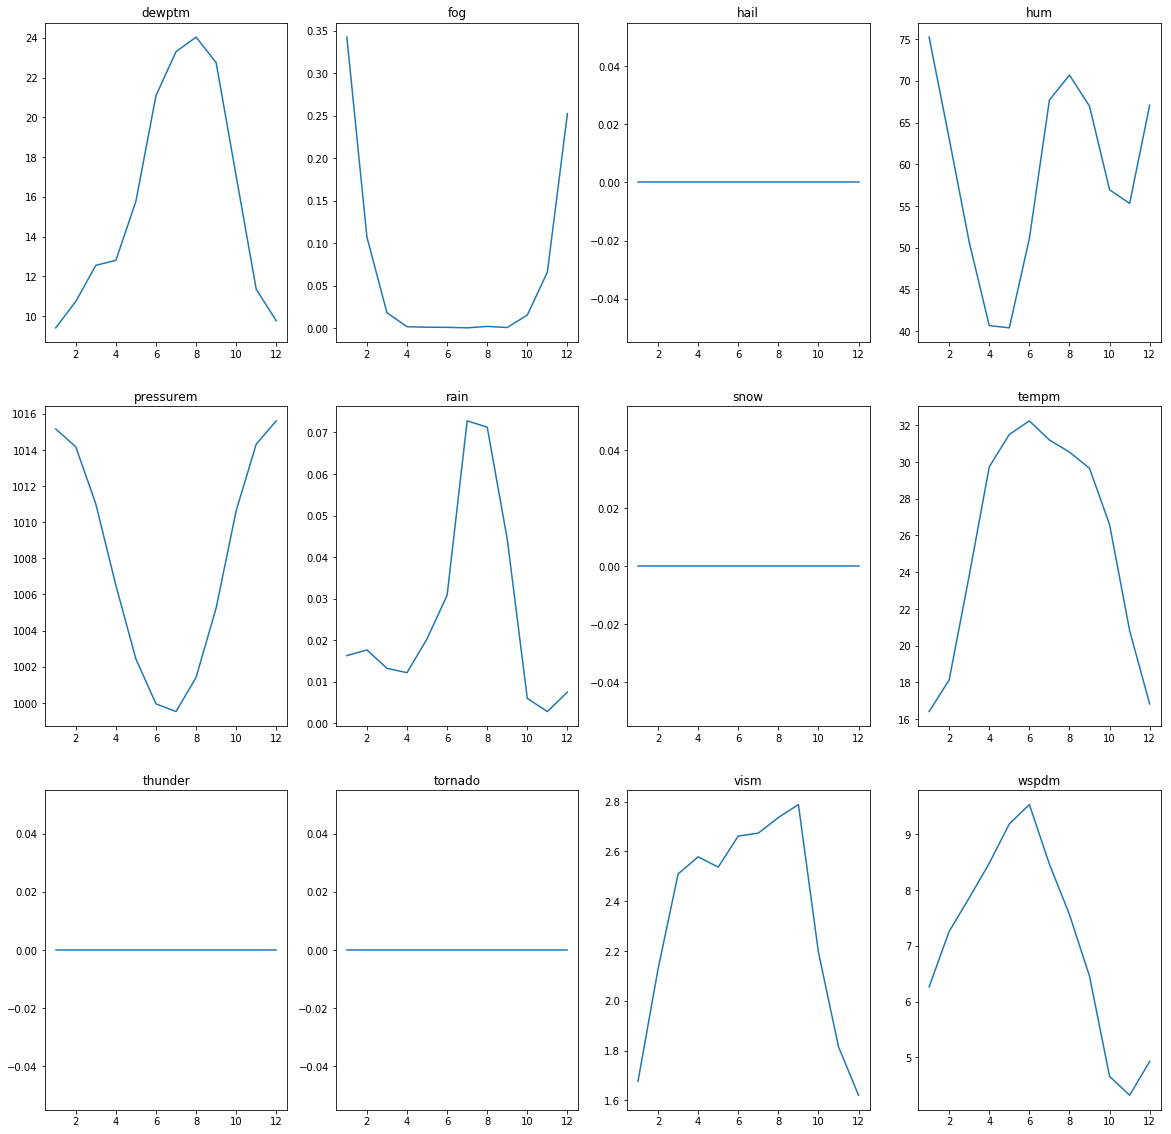

In [40]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,1)
plt.plot(monthly['dewptm'])
plt.title('dewptm')

plt.subplot(3,4,2)
plt.plot(monthly['fog'])
plt.title('fog')

plt.subplot(3,4,3)
plt.plot(monthly['hail'])
plt.title('hail')

plt.subplot(3,4,4)
plt.plot(monthly['hum'])
plt.title('hum')

plt.subplot(3,4,5)
plt.plot(monthly['pressurem'])
plt.title('pressurem')

plt.subplot(3,4,6)
plt.plot(monthly['rain'])
plt.title('rain')

plt.subplot(3,4,7)
plt.plot(monthly['snow'])
plt.title('snow')

plt.subplot(3,4,8)
plt.plot(monthly['tempm'])
plt.title('tempm')

plt.subplot(3,4,9)
plt.plot(monthly['thunder'])
plt.title('thunder')

plt.subplot(3,4,10)
plt.plot(monthly['tornado'])
plt.title('tornado')

plt.subplot(3,4,11)
plt.plot(monthly['vism'])
plt.title('vism')

plt.subplot(3,4,12)
plt.plot(monthly['wspdm'])
plt.title('wspdm')

#### Q.3 Make pie charts for different weather conditions in a month. Check out this example: https://imgur.com/NDgdPD6

In [41]:
data = dataframe.groupby(['month', 'conds']).size().unstack()

In [42]:
data

conds,Blowing Sand,Clear,Drizzle,Fog,Funnel Cloud,Haze,Heavy Fog,Heavy Rain,Heavy Thunderstorms and Rain,Heavy Thunderstorms with Hail,...,Scattered Clouds,Shallow Fog,Smoke,Squalls,Thunderstorm,Thunderstorms and Rain,Thunderstorms with Hail,Unknown,Volcanic Ash,Widespread Dust
month,,,,,,,,,,,,,,,,,,,,,
1,6.0,317.0,8.0,1434.0,NaN,1212.0,269.0,5.0,2.0,NaN,...,155.0,711.0,2439.0,NaN,3.0,26.0,1.0,28.0,1.0,10.0
2,12.0,438.0,5.0,279.0,1.0,2850.0,17.0,1.0,NaN,1.0,...,94.0,310.0,1907.0,NaN,4.0,26.0,NaN,21.0,1.0,66.0
3,34.0,226.0,4.0,35.0,NaN,4703.0,7.0,4.0,1.0,NaN,...,95.0,70.0,1484.0,NaN,7.0,30.0,4.0,13.0,1.0,121.0
4,53.0,347.0,4.0,1.0,NaN,4998.0,NaN,NaN,NaN,NaN,...,252.0,10.0,864.0,1.0,27.0,30.0,2.0,37.0,NaN,532.0
5,73.0,972.0,4.0,NaN,NaN,4641.0,NaN,NaN,2.0,NaN,...,350.0,8.0,337.0,1.0,34.0,77.0,NaN,113.0,NaN,1058.0
6,132.0,324.0,7.0,NaN,NaN,5768.0,NaN,1.0,3.0,NaN,...,289.0,1.0,178.0,3.0,28.0,74.0,1.0,65.0,NaN,757.0
7,26.0,15.0,24.0,NaN,NaN,6119.0,NaN,14.0,4.0,NaN,...,282.0,NaN,42.0,NaN,41.0,87.0,NaN,5.0,NaN,95.0
8,4.0,7.0,30.0,2.0,1.0,5894.0,NaN,1.0,7.0,NaN,...,249.0,12.0,48.0,NaN,30.0,74.0,3.0,3.0,NaN,14.0
9,26.0,84.0,16.0,2.0,NaN,5940.0,NaN,2.0,1.0,NaN,...,240.0,2.0,332.0,NaN,13.0,42.0,NaN,6.0,NaN,13.0


In [43]:
data.isna().sum()

conds
Blowing Sand                      0
Clear                             0
Drizzle                           0
Fog                               3
Funnel Cloud                     10
Haze                              0
Heavy Fog                         7
Heavy Rain                        5
Heavy Thunderstorms and Rain      4
Heavy Thunderstorms with Hail    11
Light Drizzle                     0
Light Fog                         5
Light Freezing Rain              11
Light Hail Showers               11
Light Haze                       11
Light Rain                        0
Light Rain Showers                8
Light Sandstorm                   9
Light Thunderstorm                2
Light Thunderstorms and Rain      0
Mist                              0
Mostly Cloudy                     0
Overcast                          0
Partial Fog                       4
Partly Cloudy                     0
Patches of Fog                    1
Rain                              0
Rain Showers          

In [97]:
data.columns

Index(['Blowing Sand', 'Clear', 'Drizzle', 'Fog', 'Funnel Cloud', 'Haze',
       'Heavy Fog', 'Heavy Rain', 'Heavy Thunderstorms and Rain',
       'Heavy Thunderstorms with Hail', 'Light Drizzle', 'Light Fog',
       'Light Freezing Rain', 'Light Hail Showers', 'Light Haze', 'Light Rain',
       'Light Rain Showers', 'Light Sandstorm', 'Light Thunderstorm',
       'Light Thunderstorms and Rain', 'Mist', 'Mostly Cloudy', 'Overcast',
       'Partial Fog', 'Partly Cloudy', 'Patches of Fog', 'Rain',
       'Rain Showers', 'Sandstorm', 'Scattered Clouds', 'Shallow Fog', 'Smoke',
       'Squalls', 'Thunderstorm', 'Thunderstorms and Rain',
       'Thunderstorms with Hail', 'Unknown', 'Volcanic Ash',
       'Widespread Dust'],
      dtype='object', name='conds')

In [45]:
for i in data.columns:
    data[i].fillna(data[i].mean(), inplace=True)

In [46]:
data.isna().sum()

conds
Blowing Sand                     0
Clear                            0
Drizzle                          0
Fog                              0
Funnel Cloud                     0
Haze                             0
Heavy Fog                        0
Heavy Rain                       0
Heavy Thunderstorms and Rain     0
Heavy Thunderstorms with Hail    0
Light Drizzle                    0
Light Fog                        0
Light Freezing Rain              0
Light Hail Showers               0
Light Haze                       0
Light Rain                       0
Light Rain Showers               0
Light Sandstorm                  0
Light Thunderstorm               0
Light Thunderstorms and Rain     0
Mist                             0
Mostly Cloudy                    0
Overcast                         0
Partial Fog                      0
Partly Cloudy                    0
Patches of Fog                   0
Rain                             0
Rain Showers                     0
Sandstorm     

In [50]:
conditions = list(data)[0:5]
conditions

['Blowing Sand', 'Clear', 'Drizzle', 'Fog', 'Funnel Cloud']

In [48]:
data.loc[1][0:5]

conds
Blowing Sand       6.0
Clear            317.0
Drizzle            8.0
Fog             1434.0
Funnel Cloud       1.0
Name: 1, dtype: float64

In [49]:
list(data.loc[1][0:5])

[6.0, 317.0, 8.0, 1434.0, 1.0]

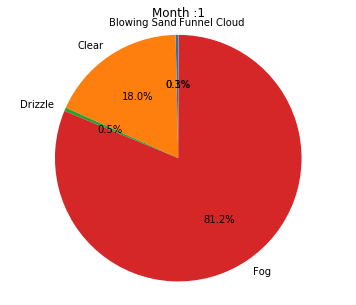

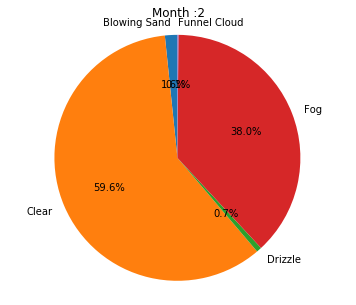

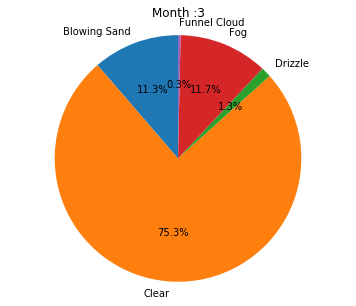

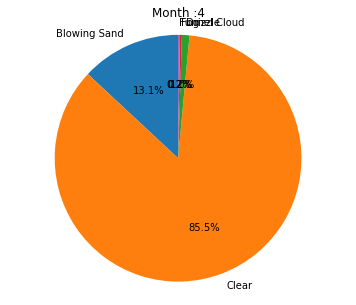

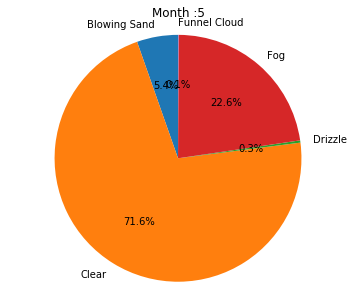

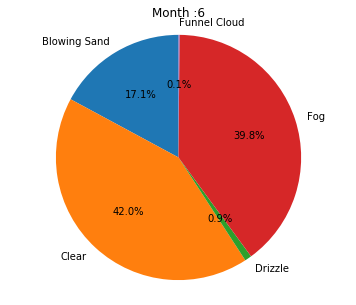

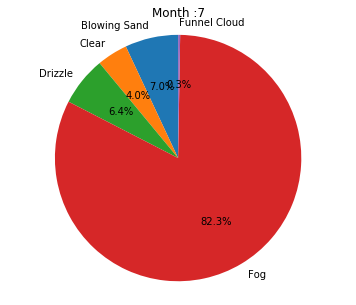

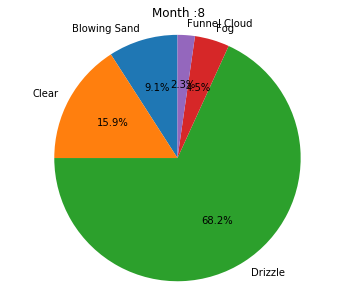

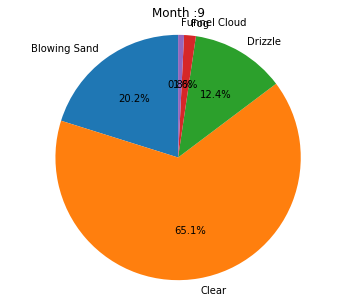

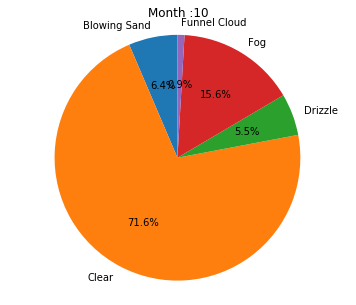

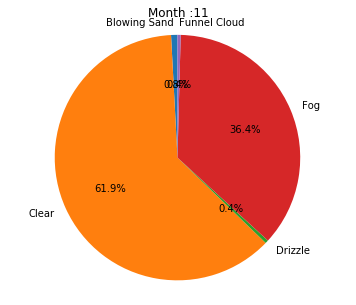

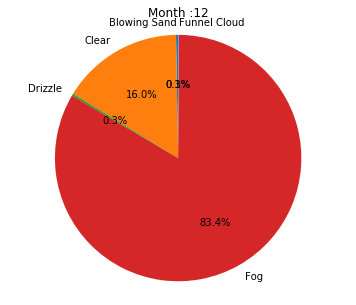

In [61]:
for i in data.index:
    values = list(data.loc[i][0:5])
    fig1 , ax1 = plt.subplots()
    ax1.pie(values, labels=conditions, startangle=90, autopct='%1.1f%%', colors='')
    ax1.axis('equal')
    fig1.set_size_inches(6,5)
    plt.title("Month :"+str(i))